In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Thyroid Dataset.csv")

In [3]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.duplicated().sum()

np.int64(19)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.reset_index(inplace=True,drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    ob

<Axes: >

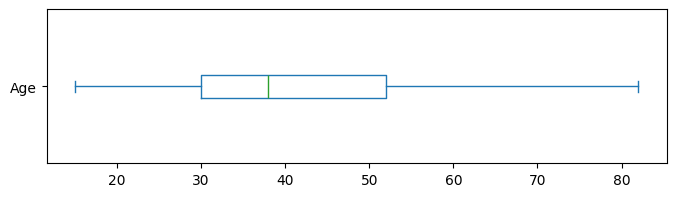

In [11]:
df["Age"].plot.box(vert=False,figsize=(8,2))

In [12]:
df["Age_group"] = pd.cut(df["Age"],bins=4,labels=["Low","Mid","High","Extreme"]) 

In [13]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred',
       'Age_group'],
      dtype='object')

In [14]:
df =df[['Age',"Age_group", 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']]

In [15]:
df.head()

,Age,Age_group,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,Low,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,Mid,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,Low,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,High,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,High,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [16]:
cat_cols = df.columns[1:-1]

In [17]:
cat_cols

Index(['Age_group', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object')

In [18]:
for i in cat_cols:
    print(pd.crosstab(df[i],df["Recurred"]))
    print("=="*40)

Recurred    No  Yes
Age_group          
Low         96   27
Mid        101   30
High        47   30
Extreme     12   21
Recurred   No  Yes
Gender            
F         227   66
M          29   42
Recurred   No  Yes
Smoking           
No        240   75
Yes        16   33
Recurred     No  Yes
Hx Smoking          
No          242   94
Yes          14   14
Recurred          No  Yes
Hx Radiothreapy          
No               255  102
Yes                1    6
Recurred                      No  Yes
Thyroid Function                     
Clinical Hyperthyroidism      17    3
Clinical Hypothyroidism       10    2
Euthyroid                    215   98
Subclinical Hyperthyroidism    5    0
Subclinical Hypothyroidism     9    5
Recurred                     No  Yes
Physical Examination                
Diffuse goiter                7    0
Multinodular goiter          83   52
Normal                        5    2
Single nodular goiter-left   62   26
Single nodular goiter-right  99   28
Recurred     No

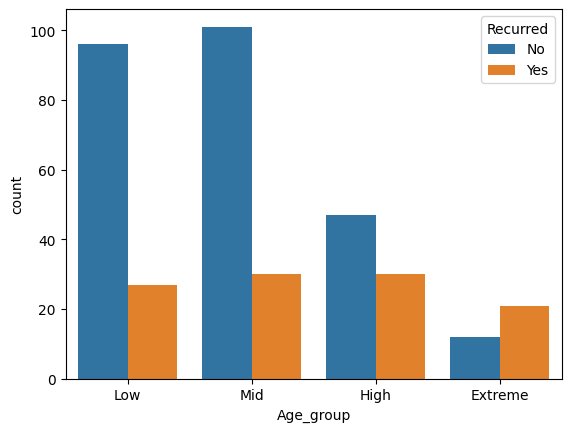

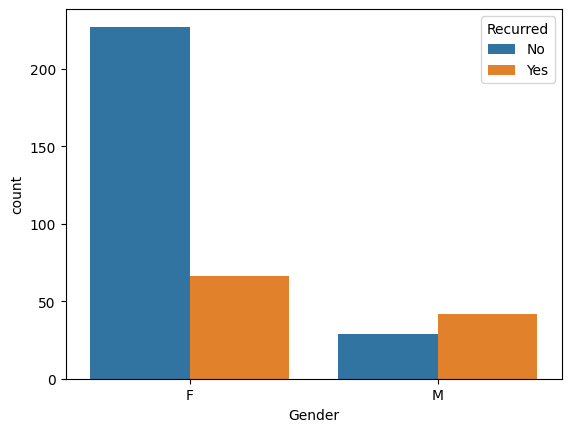

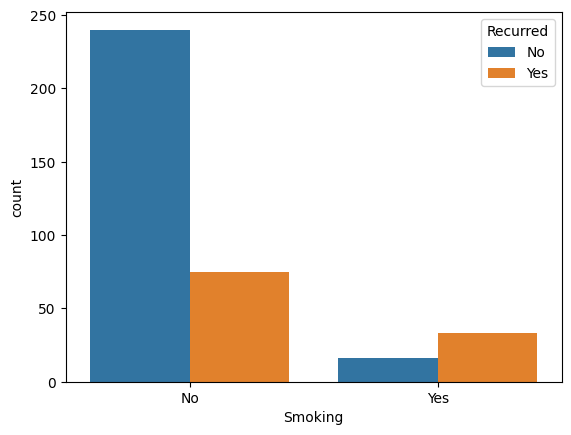

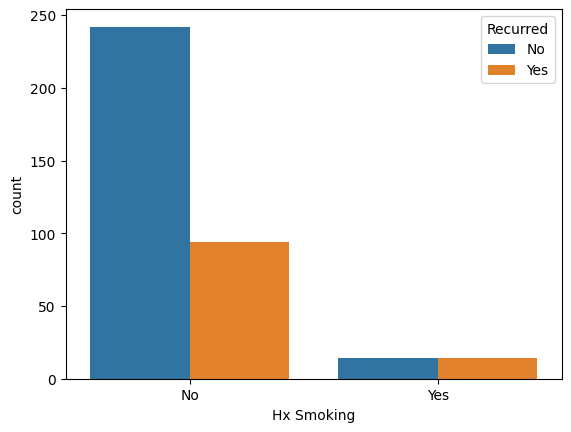

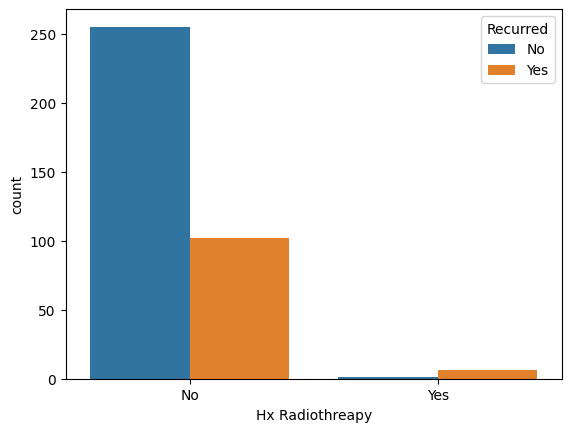

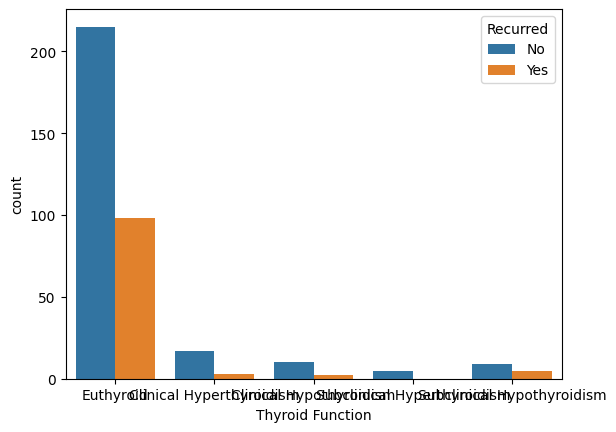

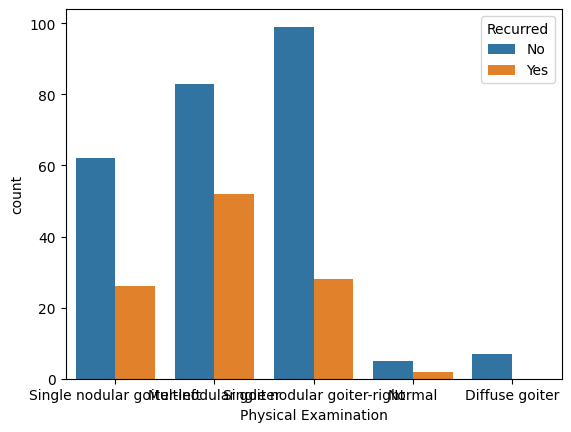

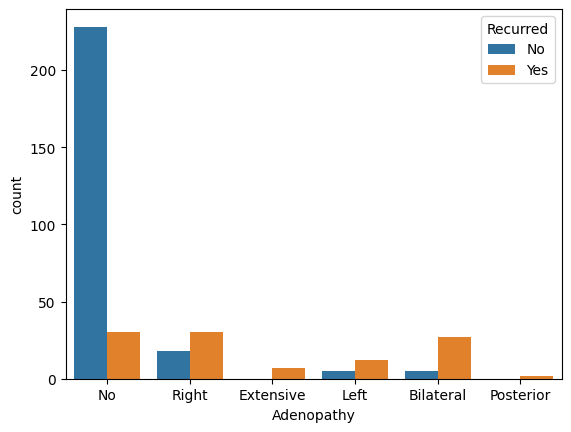

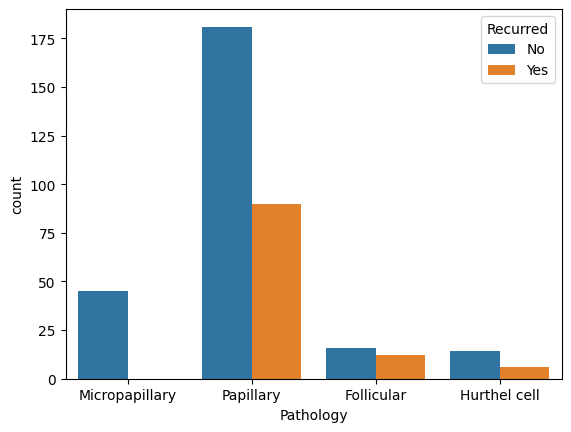

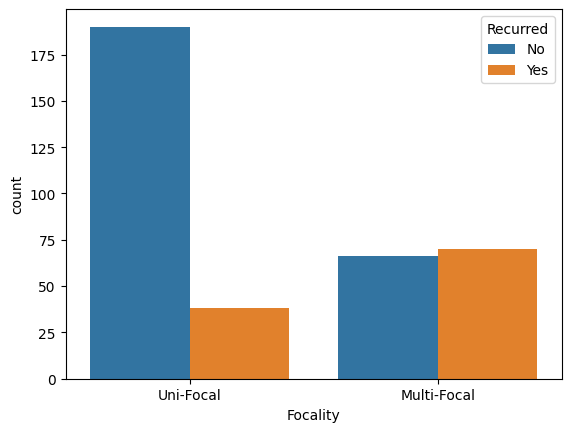

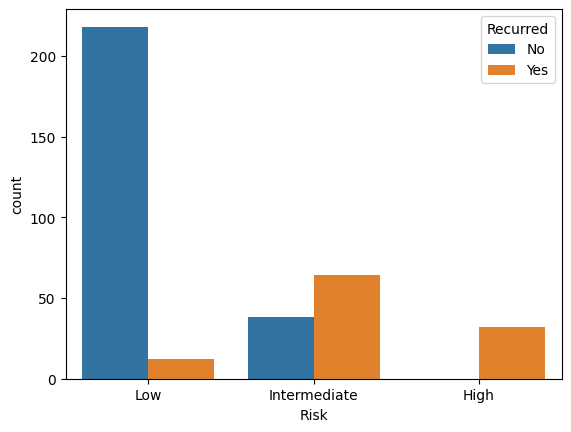

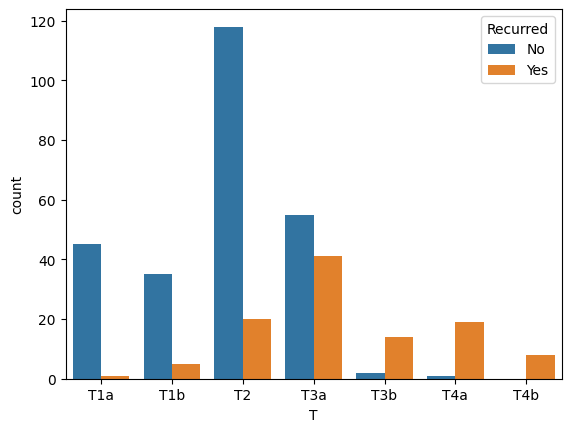

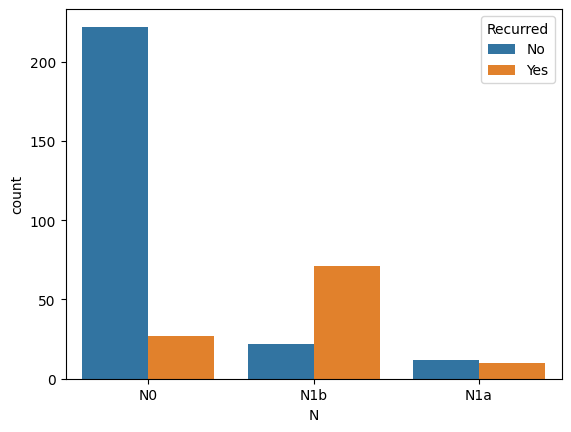

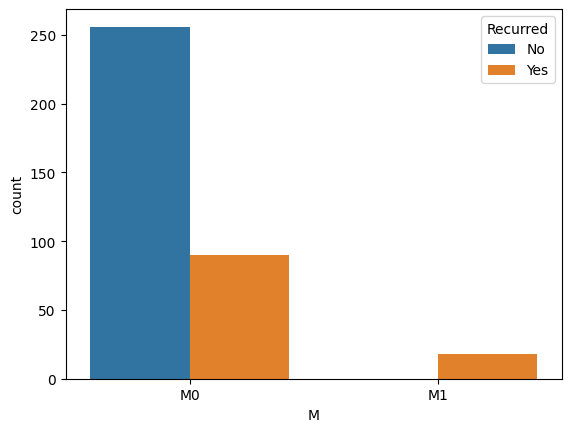

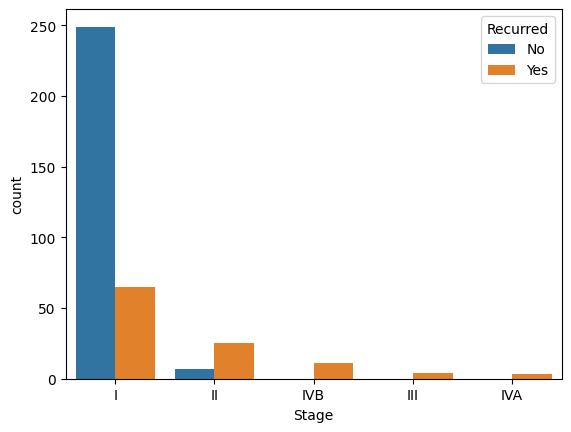

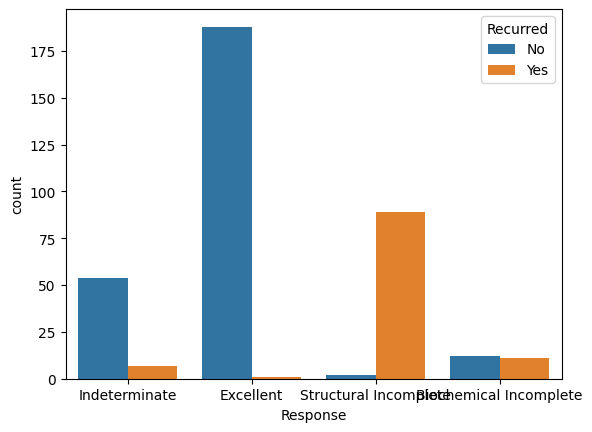

In [19]:
for i in cat_cols:
    sns.countplot(df , x=i,hue="Recurred")
    plt.show()

In [20]:
ohe = OneHotEncoder()

In [21]:
df.drop("Age_group",axis=1,inplace=True)

In [22]:
encoded = ohe.fit_transform(df[cat_cols[1:]])

In [23]:
encoded.toarray()

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [24]:
df[ohe.get_feature_names_out()] = encoded.toarray() 

In [25]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df.drop(cat_cols[1:],axis=1,inplace=True)

In [27]:
le = LabelEncoder()

In [28]:
df["Recurred"]=le.fit_transform(df["Recurred"])

In [29]:
df.head()

,Age,Recurred,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,30,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,62,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,62,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
scaler = StandardScaler()

In [31]:
df["Age"] = scaler.fit_transform(df[["Age"]])

In [32]:
df.head()

,Age,Recurred,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,...,M_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,-0.931780,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.474064,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.735616,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.356803,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.356803,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df.columns

Index(['Age', 'Recurred', 'Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Ri

In [34]:
df = df[['Age', 'Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', 'Risk_Low', 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a',
       'T_T3b', 'T_T4a', 'T_T4b', 'N_N0', 'N_N1a', 'N_N1b', 'M_M0', 'M_M1',
       'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB',
       'Response_Biochemical Incomplete', 'Response_Excellent',
       'Response_Indeterminate', 'Response_Structural Incomplete', 'Recurred']]

In [35]:
df.head()

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred
0,-0.931780,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.474064,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.735616,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1.356803,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1.356803,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


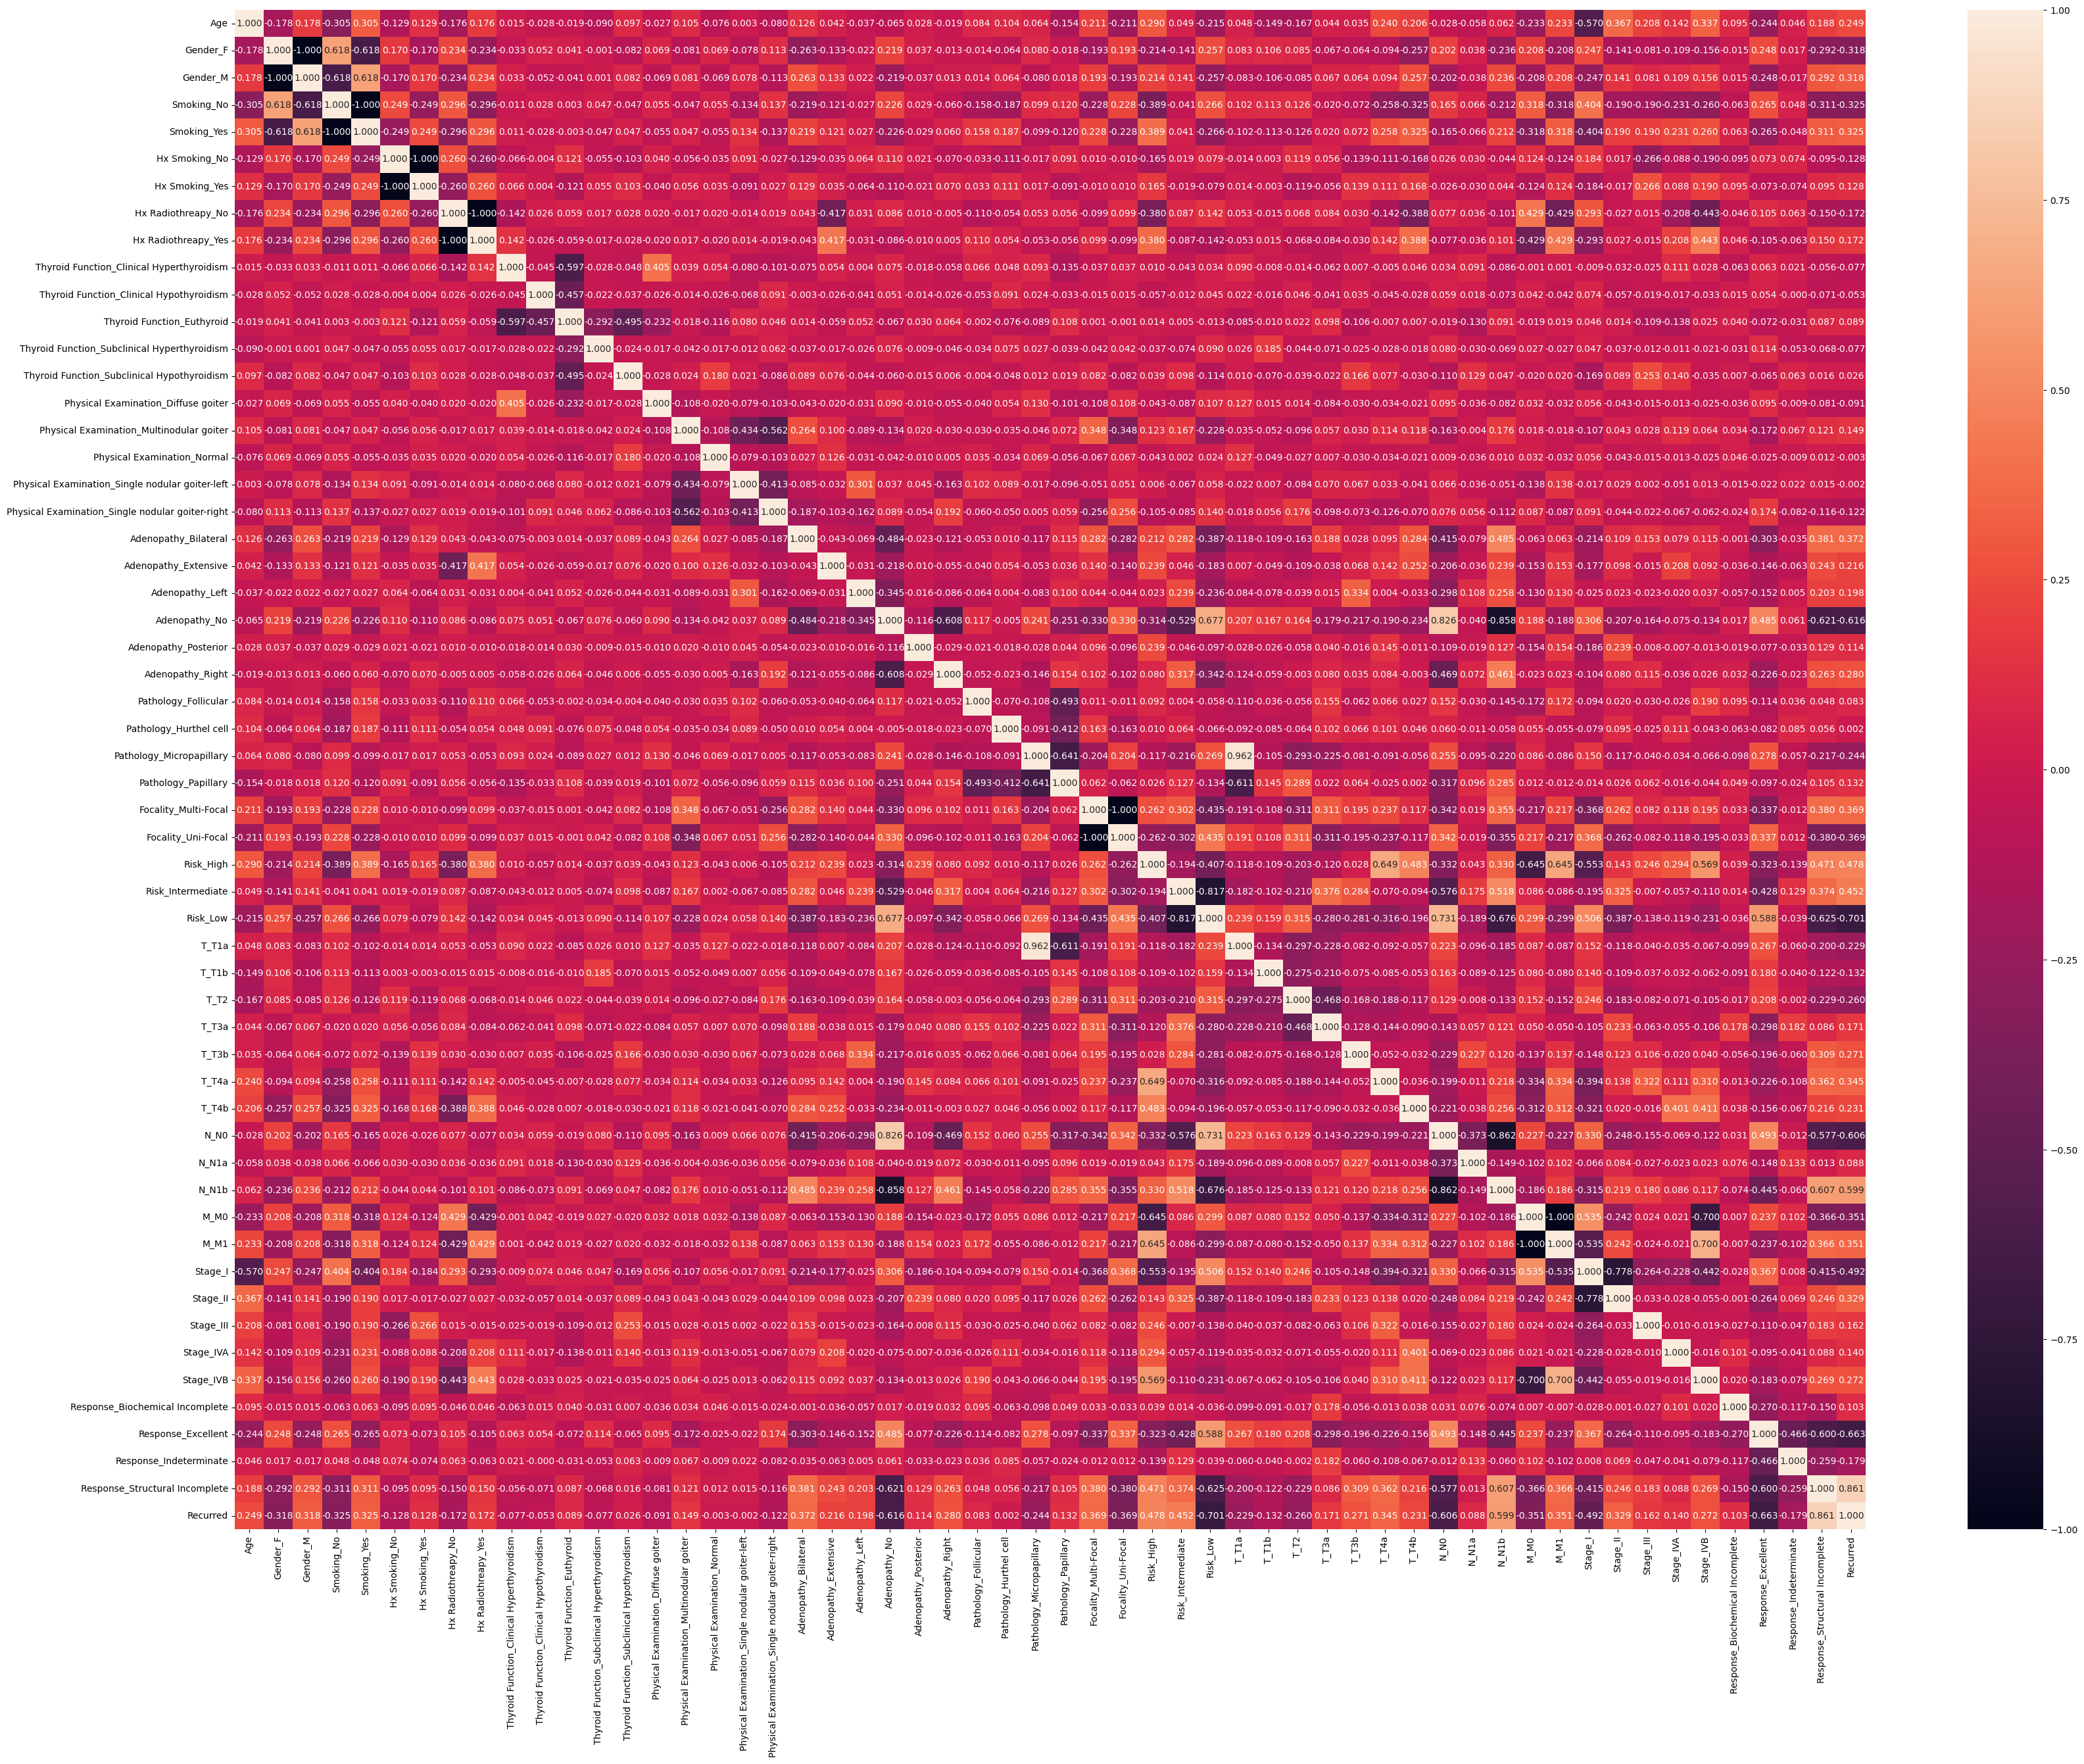

In [36]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True,fmt=".3f",vmin=-1,vmax=1)
plt.savefig("thyroid cancer heatmap")
plt.show()

In [37]:
from sklearn.utils import resample

In [38]:
df["Recurred"].value_counts()

Recurred
0    256
1    108
Name: count, dtype: int64

In [39]:
class_0=df[df["Recurred"]==0]
class_1=df[df["Recurred"]==1]


In [40]:
resampled_class_1= resample(class_1,n_samples=len(class_0))

In [41]:
new_df = pd.concat([class_0,resampled_class_1])
new_df

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred
0,-0.931780,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.474064,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.735616,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1.356803,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1.356803,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.076071,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
335,-0.408675,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
311,0.702922,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
305,2.468400,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [42]:
df["Recurred"].value_counts()

Recurred
0    256
1    108
Name: count, dtype: int64

In [43]:
new_df.reset_index(drop=True,inplace=True)

In [75]:
new_df["Recurred"].value_counts()

Recurred
0    256
1    256
Name: count, dtype: int64

# principal componant analysis

In [44]:
pca = PCA(n_components=10) 

In [45]:
X = new_df.drop("Recurred",axis=1)
y= new_df["Recurred"]

In [46]:
X.shape

(512, 55)

In [47]:
X= pca.fit_transform(X)

In [48]:
X.shape

(512, 10)

In [49]:
# (pca.explained_variance_)this is top 10 eigen values

In [50]:
pca.explained_variance_

array([1.95236773, 1.15681496, 0.51890261, 0.43005045, 0.38908232,
       0.37887297, 0.27873164, 0.26095318, 0.20630021, 0.1947782 ])

In [51]:
# this is covariance metrix 

In [52]:
pca.get_covariance

<bound method _BasePCA.get_covariance of PCA(n_components=10)>

In [53]:
pca.components_

array([[ 5.36250688e-01, -1.35752081e-01,  1.35752081e-01,
        -1.58811564e-01,  1.58811564e-01, -2.11213461e-02,
         2.11213461e-02, -3.76067624e-02,  3.76067624e-02,
        -1.18888666e-02, -1.23795259e-02,  1.91141713e-02,
        -8.17015228e-03,  1.33243735e-02, -1.02768539e-02,
         7.50479602e-02, -7.45099156e-03,  1.35951969e-02,
        -7.09153116e-02,  8.91468537e-02,  2.98379605e-02,
         1.80223545e-02, -2.15063778e-01,  5.50856882e-03,
         7.25480404e-02,  1.37961278e-02,  1.75719667e-02,
        -5.18871678e-02,  2.05190732e-02,  2.23581604e-01,
        -2.23581604e-01,  1.27850675e-01,  1.50154339e-01,
        -2.78005015e-01, -5.13299835e-02, -4.52978148e-02,
        -1.30249008e-01,  7.68466702e-02,  3.05527310e-02,
         8.13685559e-02,  3.81088489e-02, -2.11924696e-01,
         5.61273490e-03,  2.06311961e-01, -9.31350411e-02,
         9.31350411e-02, -2.29077575e-01,  1.32615386e-01,
         1.86527553e-02,  8.29826575e-03,  6.95111683e-0

In [54]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,random_state=34,train_size=0.75)

# support vector machine

In [55]:
model=SVC(kernel="linear")

In [56]:
model.fit(X_tr,y_tr)

SVC(kernel='linear')

In [57]:
model.score(X_tr,y_tr)

0.9427083333333334

In [58]:
y_pr=model.predict(X_te)

In [59]:
y_pr

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [60]:
accuracy_score(y_te,y_pr)

0.921875

In [61]:
# we can use grid search CV here to increase the accuracy of model

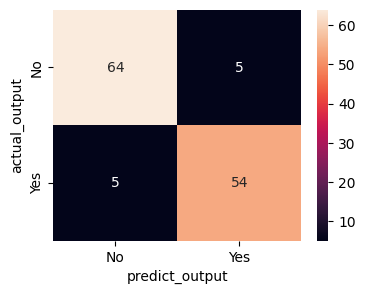

In [62]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_te,y_pr),annot=True,xticklabels=["No","Yes"],yticklabels=["No","Yes"])
plt.xlabel("predict_output")
plt.ylabel("actual_output")
plt.show()

In [63]:
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        69
           1       0.92      0.92      0.92        59

    accuracy                           0.92       128
   macro avg       0.92      0.92      0.92       128
weighted avg       0.92      0.92      0.92       128



In [64]:
tn,fp,fn,tp = confusion_matrix(y_te,y_pr).ravel()

In [65]:
tn,fp,fn,tp

(np.int64(64), np.int64(5), np.int64(5), np.int64(54))